1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

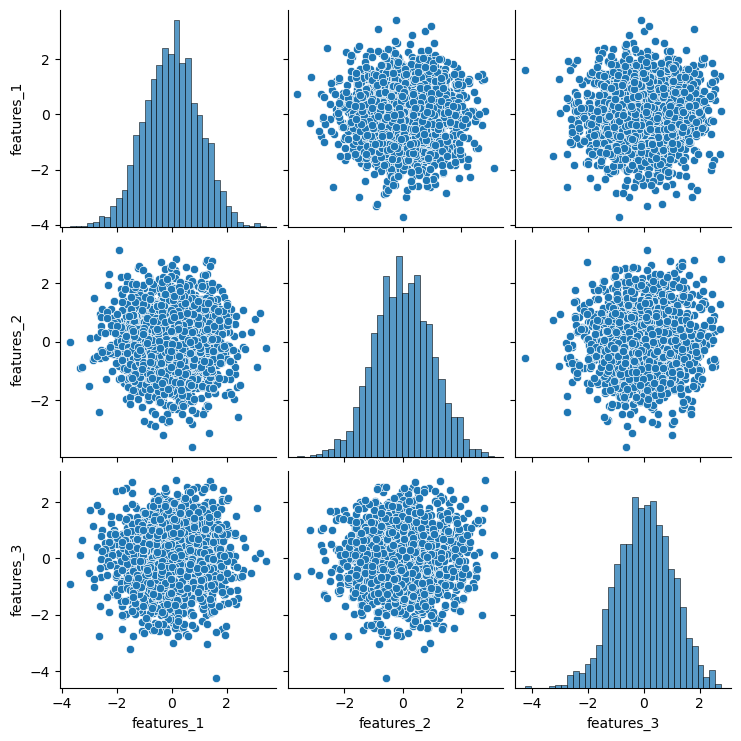

Correlation Matrix:
            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/regression_generated.csv')
selected_features = ['features_1', 'features_2', 'features_3']

sns.pairplot(df[selected_features])
plt.show()
correlation_matrix = df[selected_features].corr()

print("Correlation Matrix:")
print(correlation_matrix)
#from correlation matrix and also from the shape of the plots that don't suggest specific patterns i would say that features
#are not correlated

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

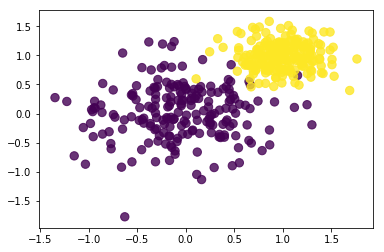

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

     Feature 1  Feature 2  Category
0     2.421064   1.352146       0.0
1     2.517044   2.881936       0.0
2     4.283119   3.461184       0.0
3     3.307249   2.483964       0.0
4     2.012160   3.227681       0.0
..         ...        ...       ...
195  -2.830654  -3.724504       1.0
196  -3.151696  -3.537371       1.0
197  -3.326418  -2.316334       1.0
198  -2.772158  -2.300422       1.0
199  -3.439506  -3.299654       1.0

[200 rows x 3 columns]


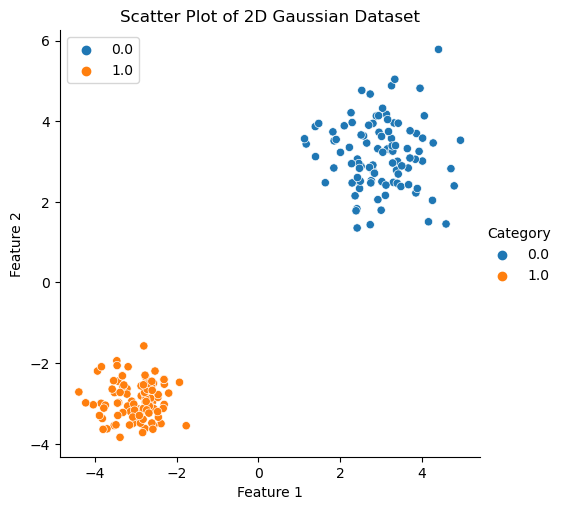

In [3]:

import numpy as np
def gaussian_dataset(n_samples, mean1, std1, mean2, std2):
    
    category1 = np.random.normal(mean1, std1, size=(n_samples, 2))
    category2 = np.random.normal(mean2, std2, size=(n_samples, 2))

    labels_category1 = np.zeros(n_samples)
    labels_category2 = np.ones(n_samples)

    X = np.concatenate([category1, category2])
    y = np.concatenate([labels_category1, labels_category2])
    df = pd.DataFrame(data=np.c_[X, y], columns=['Feature 1', 'Feature 2', 'Category'])
    print(df)

    return df

def plot_scatter(df):
    
    sns.relplot(x="Feature 1", y="Feature 2", hue="Category", data=df)

    plt.title('Scatter Plot of 2D Gaussian Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
mean1 = (3, 3)
std1 = (0.8, 0.8)

mean2 = (-3, -3)
std2 = (0.5, 0.5)

samples = 100

dataset = gaussian_dataset(samples, mean1, std1, mean2, std2)
plot_scatter(dataset)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
           distances  residuals
distances   1.000000   0.056598
residuals   0.056598   1.000000


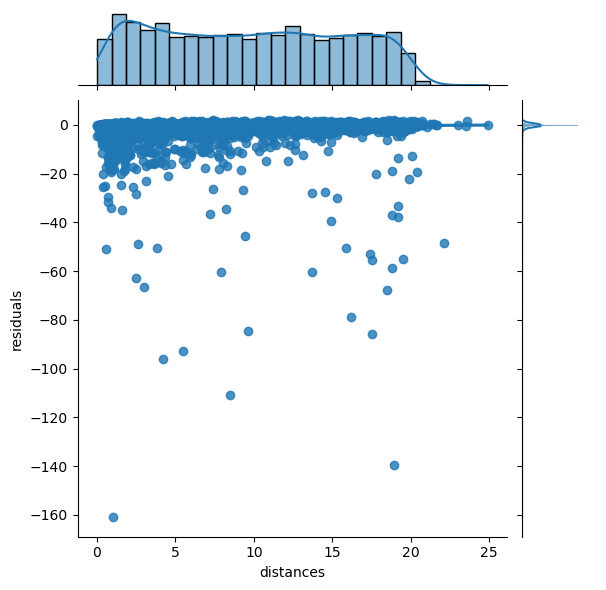

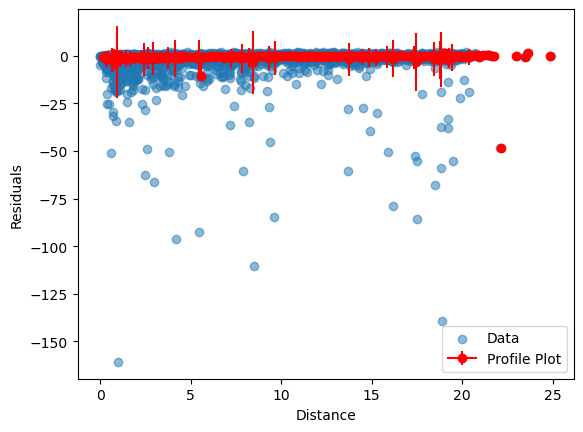

In [4]:
import pickle


file_name = 'data/residuals_261.pkl'
infile = open(file_name, 'rb')
new_dict = pickle.load(infile)
infile.close()
dictionary = new_dict[()]
df = pd.DataFrame(dictionary)
print(df)
cleaned_sample = df[np.abs(df['residuals'] < 2)]

sns.jointplot(data = cleaned_sample, x="distances", y="residuals", kind="reg")
selected_features = ['distances', 'residuals']
correlation_matrix = df[selected_features].corr()
print(correlation_matrix)

plt.show()

bin_width = 0.1 
bins = np.arange(cleaned_sample['distances'].min(), cleaned_sample['distances'].max() + bin_width, bin_width)
profile_hist = cleaned_sample.groupby(pd.cut(cleaned_sample['distances'], bins=bins))['residuals'].agg(['mean', 'std'])

x = (bins[:-1] + bins[1:]) / 2
y = profile_hist['mean'].values
err_y = profile_hist['std'].values

plt.scatter(cleaned_sample['distances'], cleaned_sample['residuals'], alpha=0.5, label='Data')

plt.errorbar(x, y, yerr=err_y, fmt='o-', color='red', label='Profile Plot')


plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Histogram content: [0.01118062 0.04472249 0.06708373 0.08944497 0.21243181 0.19007057
 0.23479305 0.12298684 0.06708373 0.07826435]
Bin boundaries: [ 4.76050979  5.65491445  6.54931911  7.44372376  8.33812842  9.23253308
 10.12693774 11.0213424  11.91574705 12.81015171 13.70455637]
area original histogram 0.96
area of the sum of all the gaussian functions normalized: 1.0000000000000002


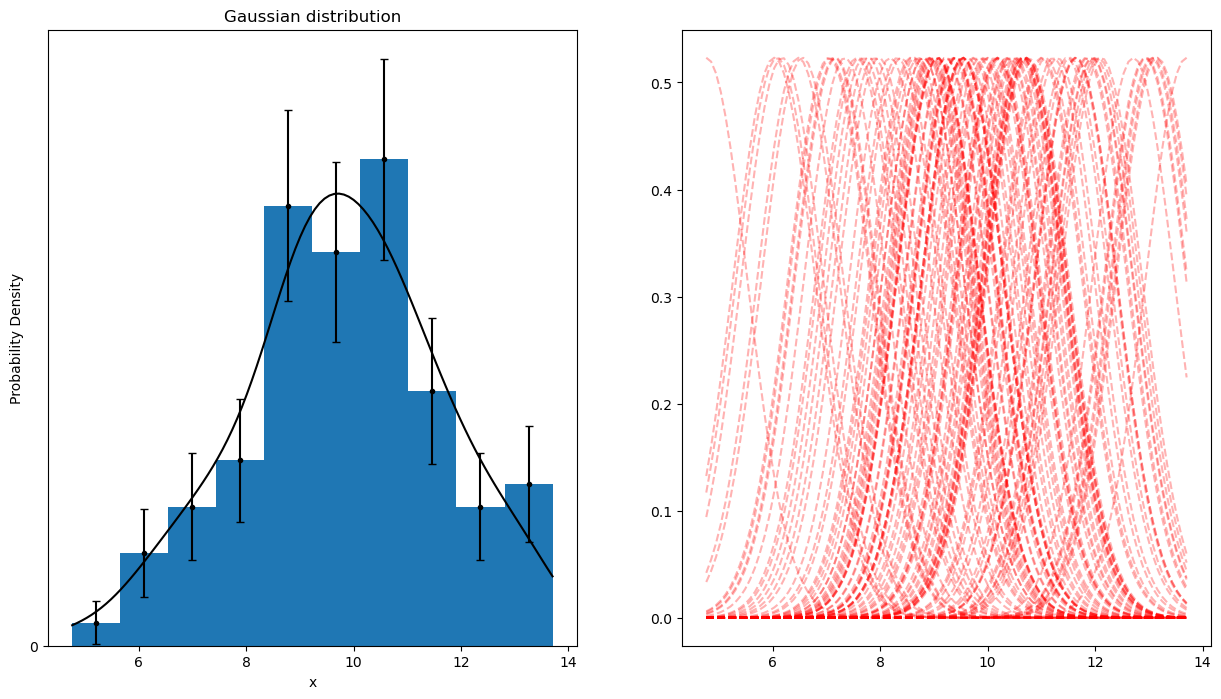

In [5]:
from scipy.integrate import trapz
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm

np.random.seed(42)

N = 100
mean = 10
std = 2
x = np.random.normal(mean, std, N)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
h, bins, _ = ax[0].hist(x, bins=10, density=True, cumulative=False)
ax[0].set_title('Gaussian distribution')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability Density')
ax[0].yaxis.set_major_locator(MultipleLocator(1))


print("Histogram content:", h)
print("Bin boundaries:", bins)

bin_centers = (bins[:-1] + bins[1:]) / 2
errors = np.sqrt(h * N) / N  # Poisson uncertainty
ax[0].errorbar(bin_centers, h, yerr=errors, fmt='.', color='black', capsize=3, label='Data Points with Errors')

std_dev_factor = 1.06 * x.std() * np.power(len(x), -0.2)
gaussians = [norm(loc=value, scale=std_dev_factor) for value in x]

x_values = np.linspace(np.min(x), np.max(x), 100)
#ax[2].plot(x_values, gaussians[0].pdf(x_values))
for gaussian in gaussians:
    ax[1].plot(x_values, gaussian.pdf(x_values), 'r--', alpha=0.3)

sum_gaussians = np.sum([gaussian.pdf(x_values) for gaussian in gaussians], axis=0)

area = trapz(sum_gaussians, x=x_values)
area2 =trapz(h, x=bins[:-1])
print(f"area original histogram {area2}")
normalized_sum_gaussians = sum_gaussians / area
area_normalized_sum_gaussians = trapz(normalized_sum_gaussians, x=x_values)
print(f"area of the sum of all the gaussian functions normalized: {area_normalized_sum_gaussians}")


ax[0].plot(x_values, normalized_sum_gaussians, 'k-', label='Sum of Gaussians (Normalized)')

plt.show()
